# Vizualizing Data

We are now exploring further our clean Age and Gender data through visualization to see whether there are some interesting insights that will be beneficial to the health sector to prevent further cases of HIV/AIDS and at the same time finding better means to assist those that are already affected. The approach is to use descriptive Stats, identify trends and do some group comparisons.

In [2]:
#Importing needed libraries
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

In [3]:
#Reading the data
df_Gender = pd.read_csv('df_Gender_Cleaned.csv')
df_Age = pd.read_csv('df_Age_Cleaned.csv')
Age_Gender_df = pd.read_csv('Age_Gender_Joined.csv')

In [4]:
Age_Gender_df.head()

,Neighborhood,Age,Total_HIV_Diagnoses_by_Age,HIV_Diagnoses_Per_100k_Polulation_by_Age,Total_AIDS_Diagnoses_by_Age,HIV_Diagnoses_Per_100k_Polulation_by_Gender,Total_Concurrent_HIV_AIDS_Diagnoses_by_Age,Gender,Total_HIV_Diagnoses_by_Gender,HIV_Diagnoses_Per_100k_Polulation_by_Gender.1,Total_Concurrent_HIV_AIDS_Diagnoses_by_Gender,Total_Aids_Diagnoses_by_Gender,AIDS_Diagnoses_Per_100k_Polulation_by_Gender
0,all,60+,39.0,10.6,51.0,1.9,13.0,all,4.0,1.9,0.0,0.0,0.0
1,all,60+,39.0,10.6,51.0,2.3,13.0,all,5.0,2.3,0.0,1.0,0.5
2,all,60+,39.0,10.6,51.0,2.9,13.0,all,6.0,2.9,0.0,7.0,3.3
3,all,60+,39.0,10.6,51.0,4.3,13.0,all,9.0,4.3,3.0,6.0,2.9
4,all,60+,39.0,10.6,51.0,4.8,13.0,all,10.0,4.8,1.0,7.0,3.3


In [5]:
Age_Gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613326 entries, 0 to 613325
Data columns (total 13 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Neighborhood                                   613326 non-null  object 
 1   Age                                            613326 non-null  object 
 2   Total_HIV_Diagnoses_by_Age                     600686 non-null  float64
 3   HIV_Diagnoses_Per_100k_Polulation_by_Age       556569 non-null  float64
 4   Total_AIDS_Diagnoses_by_Age                    604679 non-null  float64
 5   HIV_Diagnoses_Per_100k_Polulation_by_Gender    605400 non-null  float64
 6   Total_Concurrent_HIV_AIDS_Diagnoses_by_Age     609560 non-null  float64
 7   Gender                                         613326 non-null  object 
 8   Total_HIV_Diagnoses_by_Gender                  612004 non-null  float64
 9   HIV_Diagnoses_Per_100k_Polulation_by_

As a good way to kick start, lets look at the number of HIV diagnoses by age, across all races. 

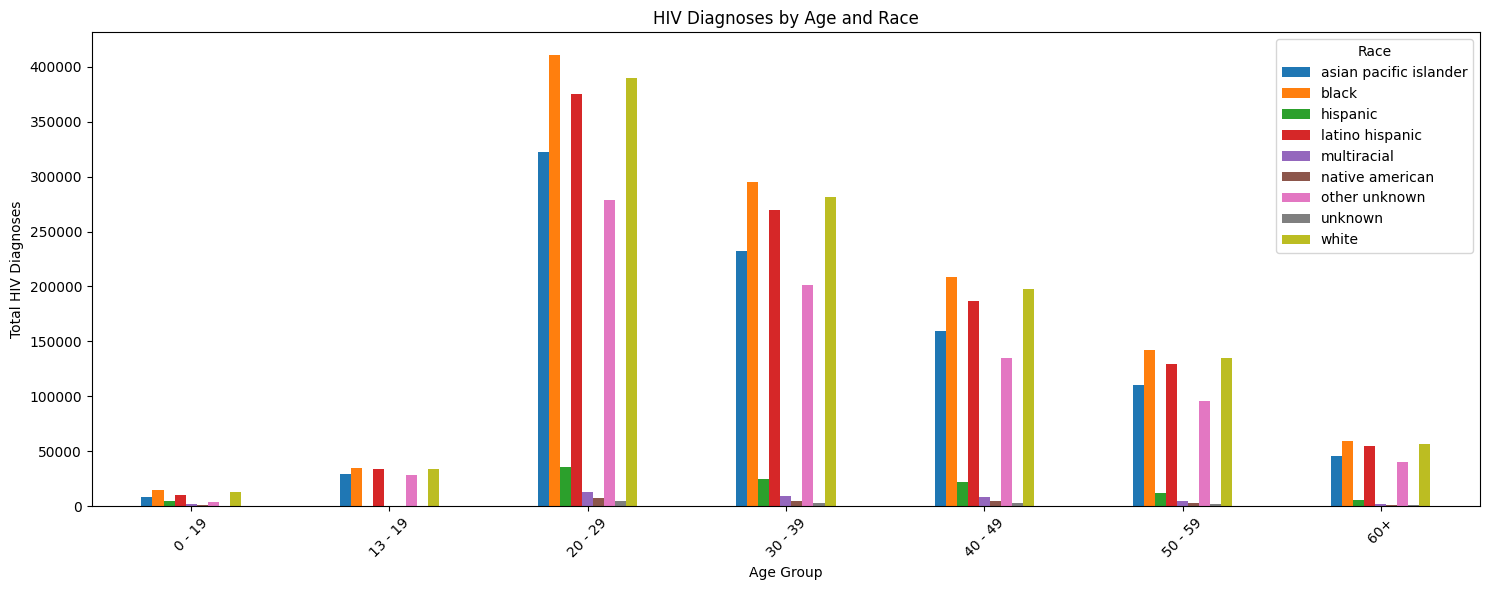

In [ ]:
# Ensure the relevant columns exist and are in the correct format
Age_Gender_df['Age'] = Age_Gender_df['Age'].astype(str)
Age_Gender_df['Gender'] = Age_Gender_df['Gender'].astype(str)
Age_Gender_df['Total_HIV_Diagnoses_by_Age'] = pd.to_numeric(Age_Gender_df['Total_HIV_Diagnoses_by_Age'], errors='coerce')

# Excluding rows where AGE or GENDER is "All" regarding whether it's lower or upper case
Age_Gender_df = Age_Gender_df[(Age_Gender_df['Age'].str.upper() != 'ALL') & (Age_Gender_df['Gender'].str.upper() != 'ALL')]

# Group the data by AGE and GENDER
grouped = Age_Gender_df.groupby(['Age', 'Gender'])['Total_HIV_Diagnoses_by_Age'].sum().unstack()

# Plotting
grouped.plot(kind='bar', figsize=(15, 6))

plt.title('HIV Diagnoses by Age and Race')
plt.xlabel('Age Group')
plt.ylabel('Total HIV Diagnoses')
plt.legend(title='Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

WE notice that the highest number of HIV diagnoses affect the age group 20 to 29, followed by 30 to 39. Lets deepdive to see whether this has to do with the neighborhood they live in and their gender

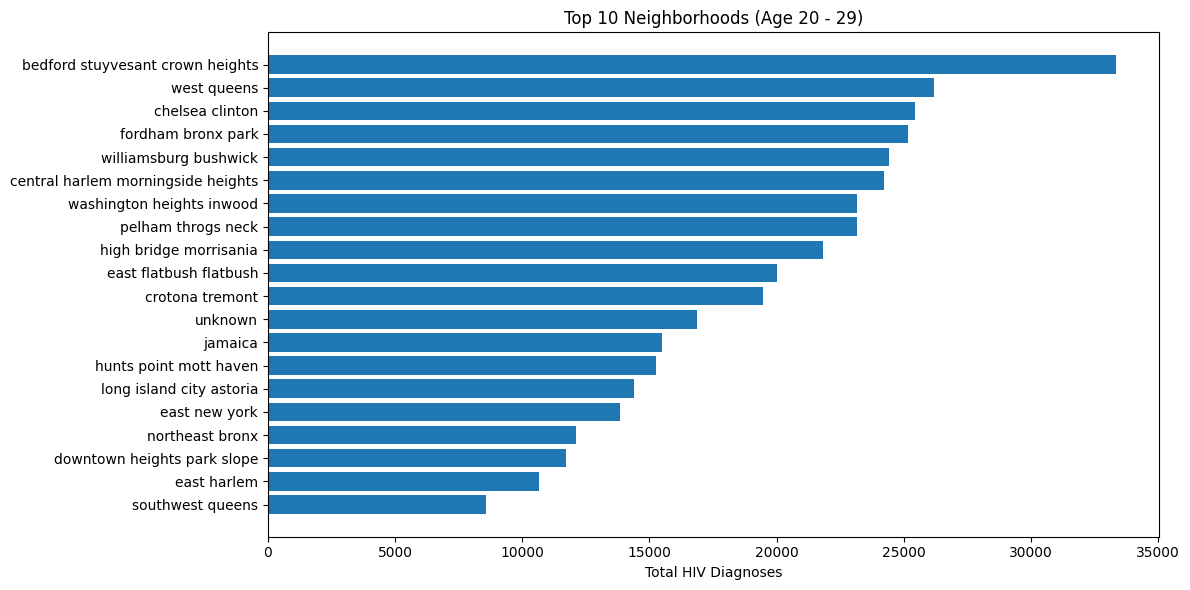

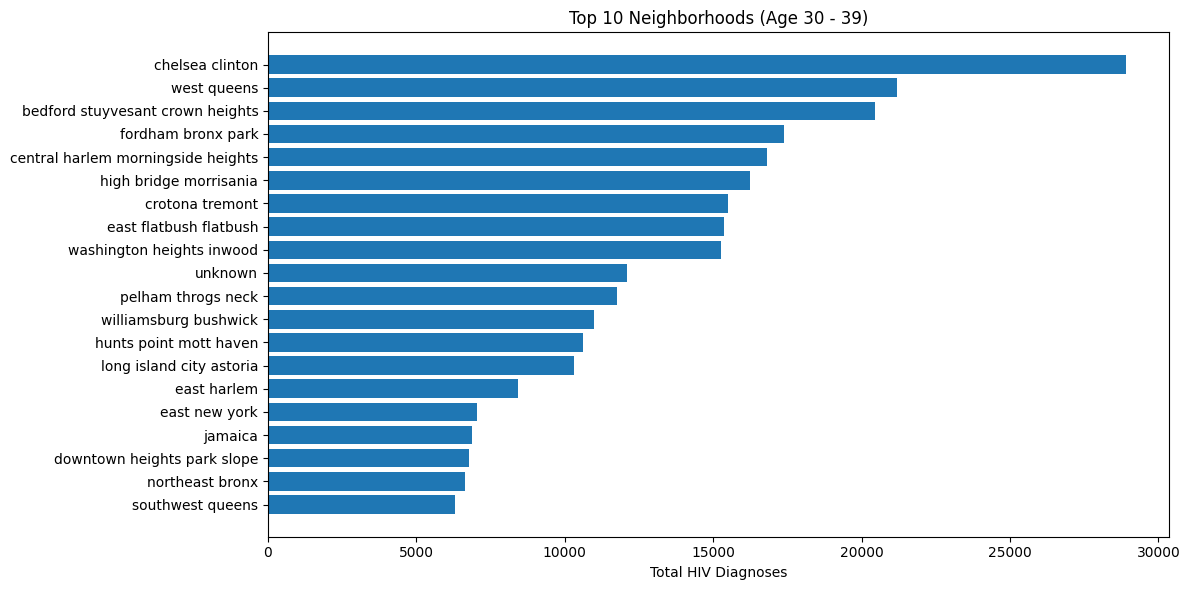

In [ ]:
# Excluding row were value is "all", whether it's upper or lower case
Age_Gender_df = Age_Gender_df[~Age_Gender_df['Neighborhood'].str.lower().eq("all")]

# Filtering for Age Groups 20 - 29 and 30 - 39
df_Group_Age_filtered = Age_Gender_df[Age_Gender_df['Age'].isin(['20 - 29', '30 - 39'])]

# Converting HIV Diagnoses column to numeric
df_Group_Age_filtered = df_Group_Age_filtered.copy()
df_Group_Age_filtered['Total_HIV_Diagnoses_by_Age'] = pd.to_numeric(
    df_Group_Age_filtered['Total_HIV_Diagnoses_by_Age'], errors='coerce'
)

# Grouping by AGE and Neighborhood, then sum
grouped = df_Group_Age_filtered.groupby(['Age', 'Neighborhood'])['Total_HIV_Diagnoses_by_Age'].sum().reset_index()

# Getting the top 20 neighborhoods per age group with highest numbers of diaognoses
top_20_29 = grouped[grouped['Age'] == '20 - 29'].nlargest(20, 'Total_HIV_Diagnoses_by_Age')
top_30_39 = grouped[grouped['Age'] == '30 - 39'].nlargest(20, 'Total_HIV_Diagnoses_by_Age')

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_20_29['Neighborhood'], top_20_29['Total_HIV_Diagnoses_by_Age'])
plt.xlabel("Total HIV Diagnoses")
plt.title("Top 10 Neighborhoods (Age 20 - 29)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(top_30_39['Neighborhood'], top_30_39['Total_HIV_Diagnoses_by_Age'])
plt.xlabel("Total HIV Diagnoses")
plt.title("Top 10 Neighborhoods (Age 30 - 39)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Now looking at the trend in diagnoses. How has this changed over time for each group?

Finally lets do some comparisons to find out which race has the highest infection rate in each neighborhood. Are there gender disparities across neighborhoods? Who are the most affected; young or old age group?